# Azcorra 2023 demo

This tutorial demonstrates how to access an NWB file from the Azcorra 2023 dataset using `pynwb`.

This session contains fiber photometry recordings from head-fixed mice running on a treadmill while receiving rewards and aversive air puffs in order to analyze differences or similarities in functional responses of different subtypes of striatonigral dopamine neurons.

Contents:

- [Reading an NWB file](#read-nwb)
- [Access Subject metadata](#access-subject)
- [Access raw fiber photometry data](#access-fiber-photometry)
- [Access processed fiber photometry data](#access-processed-fiber-photometry)
- [Access behavior](#access-behavior)
- [View NWB file](#view-nwb)


A schematic representation where the source data is saved in NWB:

![Alt text](../azcorra2023_uml.png)


# Reading an NWB file <a name="read-nwb"></a>

This section demonstrates how to read an NWB file using `pynwb`.

Based on the [NWB File Basics](https://pynwb.readthedocs.io/en/stable/tutorials/general/plot_file.html#sphx-glr-tutorials-general-plot-file-py) tutorial from [PyNWB](https://pynwb.readthedocs.io/en/stable/#).

An [NWBFile](https://pynwb.readthedocs.io/en/stable/pynwb.file.html#pynwb.file.NWBFile) represents a single session of an experiment. Each NWBFile must have a `session description`, `identifier`, and `session start time`.

Reading is carried out using the [NWBHDF5IO](https://pynwb.readthedocs.io/en/stable/pynwb.html#pynwb.NWBHDF5IO) class. To read the NWB file use the read mode ("r") to retrieve an NWBFile object.

In [1]:
from pynwb import NWBHDF5IO

# The file path to a .nwb file
nwbfile_path = "/Volumes/LaCie/CN_GCP/Dombeck/Azcorra2023_nwbfiles/VGlut-A997-20200205-0001.nwb"
io = NWBHDF5IO(path=nwbfile_path, mode="r", load_namespaces=True)
nwbfile = io.read()

nwbfile

,location,indicator,optical_fiber,excitation_source,photodetector,dichroic_mirror,fiber_depth_in_mm,baseline_fluorescence,normalized_fluorescence,recording_target_type,signal_to_noise_ratio,cross_correlation_with_acceleration,coordinates,emission_filter,excitation_filter
id,,,,,,,,,,,,,,,
0,SNc,GCaMP6f abc.Indicator at 0x4975005584\nFields:\n injection_coordinates_in_mm: [-3.25 1.55 -3.8 ]\n injection_location: SNc\n label: AAV-GCaMP6f\n,Fiber1 abc.OpticalFiber at 0x5095934032\nFields:\n core_diameter_in_um: 200.0\n description: The optical fiber used to record the GCaMP fluorescence from the SNc brain region.\n manufacturer: Doric\n model: MFP_200/230/900-0.57_1.5m_FC-FLT_LAF\n numerical_aperture: 0.57\n,"ExcitationSource470 abc.ExcitationSource at 0x5096443728\nFields:\n description: Blue excitation light (470 nm LED, Thorlabs, M70F3) and violet excitation light (for the isosbestic control)\nwere coupled into the optic fiber such that a power of 0.75 mW was delivered to the fiber tip.\nThen, 470 nm and 405 nm excitation were alternated at 100 Hz using a waveform generator,\neach filtered with a corresponding filter.\n\n excitation_wavelength_in_nm: 470.0\n illumination_type: LED\n manufacturer: Thorlabs\n model: M70F3\n",PhotodetectorPMT abc.Photodetector at 0x4975814736\nFields:\n description: Hamamatsu GaAsP photomultiplier tube (signal amplified using Stanford Research Systems SR570 preamplifier).\n detected_wavelength_in_nm: 520.0\n detector_type: PMT\n manufacturer: Hamamatsu Photonics\n model: H10770PA-40\n,DichroicMirrorGreen abc.DichroicMirror at 0x4975609104\nFields:\n cut_on_wavelength_in_nm: 505.0\n description: The dichroic mirror used to separate green fluorescence from the excitation light.\n manufacturer: Chroma Tech Corp\n model: T505lpxr\n transmission_band_in_nm: [505. 750.]\n,3.6,1.041767,0.686421,cell bodies in SNc,18.898114,0.067393,"[nan, nan, nan]",EmissionFilterGreen abc.BandOpticalFilter at 0x4975620496\nFields:\n bandwidth_in_nm: 50.0\n center_wavelength_in_nm: 540.0\n description: The band-pass filter used to further filter the green fluorescence after it was separated from the excitation light by a dichroic mirror.\n filter_type: Bandpass\n manufacturer: Semrock\n model: FF01-540/50-25\n,OpticalFilter470 abc.BandOpticalFilter at 0x4975952720\nFields:\n bandwidth_in_nm: 30.0\n center_wavelength_in_nm: 472.0\n description: The band-pass filter used to isolate the 470 nm excitation light.\n filter_type: Bandpass\n manufacturer: Semrock\n model: FF02-472/30-25\n
1,SNc,GCaMP6f abc.Indicator at 0x4975005584\nFields:\n injection_coordinates_in_mm: [-3.25 1.55 -3.8 ]\n injection_location: SNc\n label: AAV-GCaMP6f\n,Fiber1 abc.OpticalFiber at 0x5095934032\nFields:\n core_diameter_in_um: 200.0\n description: The optical fiber used to record the GCaMP fluorescence from the SNc brain region.\n manufacturer: Doric\n model: MFP_200/230/900-0.57_1.5m_FC-FLT_LAF\n numerical_aperture: 0.57\n,"ExcitationSource405 abc.ExcitationSource at 0x4975008656\nFields:\n description: Violet LED (405 nm, Thorlabs, M405FP1) for the isosbestic control.\n excitation_wavelength_in_nm: 405.0\n illumination_type: LED\n manufacturer: Thorlabs\n model: M405FP1\n",PhotodetectorPMT abc.Photodetector at 0x4975814736\nFields:\n description: Hamamatsu GaAsP photomultiplier tube (signal amplified using Stanford Research Systems SR570 preamplifier).\n detected_wavelength_in_nm: 520.0\n detector_type: PMT\n manufacturer: Hamamatsu Photonics\n model: H10770PA-40\n,DichroicMirrorGreen abc.DichroicMirror at 0x4975609104\nFields:\n cut_on_wavelength_in_nm: 505.0\n description: The dichroic mirror used to separate green fluorescence from the excitation light.\n manufacturer: Chroma Tech Corp\n model: T505lpxr\n transmission_band_in_nm: [505. 750.]\n,3.6,1.041767,0.686421,cell bodies in SNc,18.898114,0.067393,"[nan, nan, nan]",EmissionFilterGreen abc.BandOpticalFilter at 0x4975620496\nFields:\n bandwidth_in_nm: 50.0\n center_wavelength_in_nm: 540.0

# Access subject metadata <a name="access-subject"></a>

This section demonstrates how to access the [Subject](https://pynwb.readthedocs.io/en/stable/pynwb.file.html#pynwb.file.Subject) field in an NWB file.

The [Subject](https://pynwb.readthedocs.io/en/stable/pynwb.file.html#pynwb.file.Subject) field can be accessed as `nwbfile.subject`.

In [2]:
nwbfile.subject

subject pynwb.file.Subject at 0x4975012176
Fields:
  age: P8W/P16W
  age__reference: birth
  genotype: Vglut2-IRES-Cre/Th-Flpo (RRID, IMSR_JAX:016963)
  sex: F
  species: Mus musculus
  strain: C57BL6
  subject_id: VGlut-A997

# Access fiber photometry data <a name="access-fiber-photometry"></a>

This section demonstrates how to access the fiber photometry data in the NWBfile.

`NWB` organizes data into different groups depending on the type of data. Groups can be thought of as folders within the file. Here are some of the groups within an NWBFile and the types of data they are intended to store:

- `acquisition`: raw, acquired data that should never change
- `processing`: processed data, typically the results of preprocessing algorithms and could change

## Picoscope signals

The raw fluorescence traces and the raw velocity from the rotary encoder are stored in a [pynwb.base.TimeSeries](https://pynwb.readthedocs.io/en/stable/pynwb.base.html#pynwb.base.TimeSeries) object which is added to `nwbfile.acquisition`. The traces collected at 4000 Hz from the Picoscope can be accessed as `nwbfile.acquisition["FluorescenceFiber1"]` for fluorescence from Fiber 1 and `nwbfile.acquisition["Velocity"]` for velocity.



In [3]:
fluorescence_picoscope = nwbfile.acquisition["FluorescenceFiber1"]
fluorescence_picoscope

FluorescenceFiber1 pynwb.base.TimeSeries at 0x5096447248
Fields:
  comments: no comments
  conversion: 1.0
  data: <HDF5 dataset "data": shape (6761014,), type "<f4">
  description: The fluorescence traces from Fiber1 collected at 4000 Hz by Picoscope.
  offset: 0.0
  rate: 4000.2000543686745
  resolution: -1.0
  starting_time: 0.0
  starting_time_unit: seconds
  unit: Volts

In [4]:
velocity_picoscope = nwbfile.acquisition["Velocity"]
velocity_picoscope

Velocity pynwb.base.TimeSeries at 0x5096489296
Fields:
  comments: no comments
  conversion: 1.0
  data: <HDF5 dataset "data": shape (6761014,), type "<f4">
  description: Velocity from rotary encoder collected at 4000 Hz by Picoscope.
  offset: 0.0
  rate: 4000.2000543686745
  resolution: -1.0
  starting_time: 0.0
  starting_time_unit: seconds
  unit: Volts

## Picoscope binary signals

The onset times of binary signals from the PicoScope are stored in an `EventsTable` object using [`ndx-events`](https://github.com/rly/ndx-events) and can be accessed as `nwbfile.acquisition["PicoScopeEvents"]`. The id of events and the description of the events can be accessed as `nwbfile.acquisition["PicoScopeEventTypes"]`.

In [5]:
import pandas as pd

events = pd.merge(
    left=nwbfile.acquisition["PicoScopeEvents"][:],
    right=nwbfile.acquisition["PicoScopeEventTypes"][:],
    left_on="event_type",
    right_on="id",
)
events.head()

,timestamp,event_type,event_name,event_type_description
0,0.008000,0,Light stimulus trigger,The onset times of the Light stimulus trigger ...
1,0.008000,3,Airpuff delivery trigger,The onset times of the Airpuff delivery trigge...
2,0.009000,3,Airpuff delivery trigger,The onset times of the Airpuff delivery trigge...
3,0.009500,3,Airpuff delivery trigger,The onset times of the Airpuff delivery trigge...
4,0.013249,3,Airpuff delivery trigger,The onset times of the Airpuff delivery trigge...


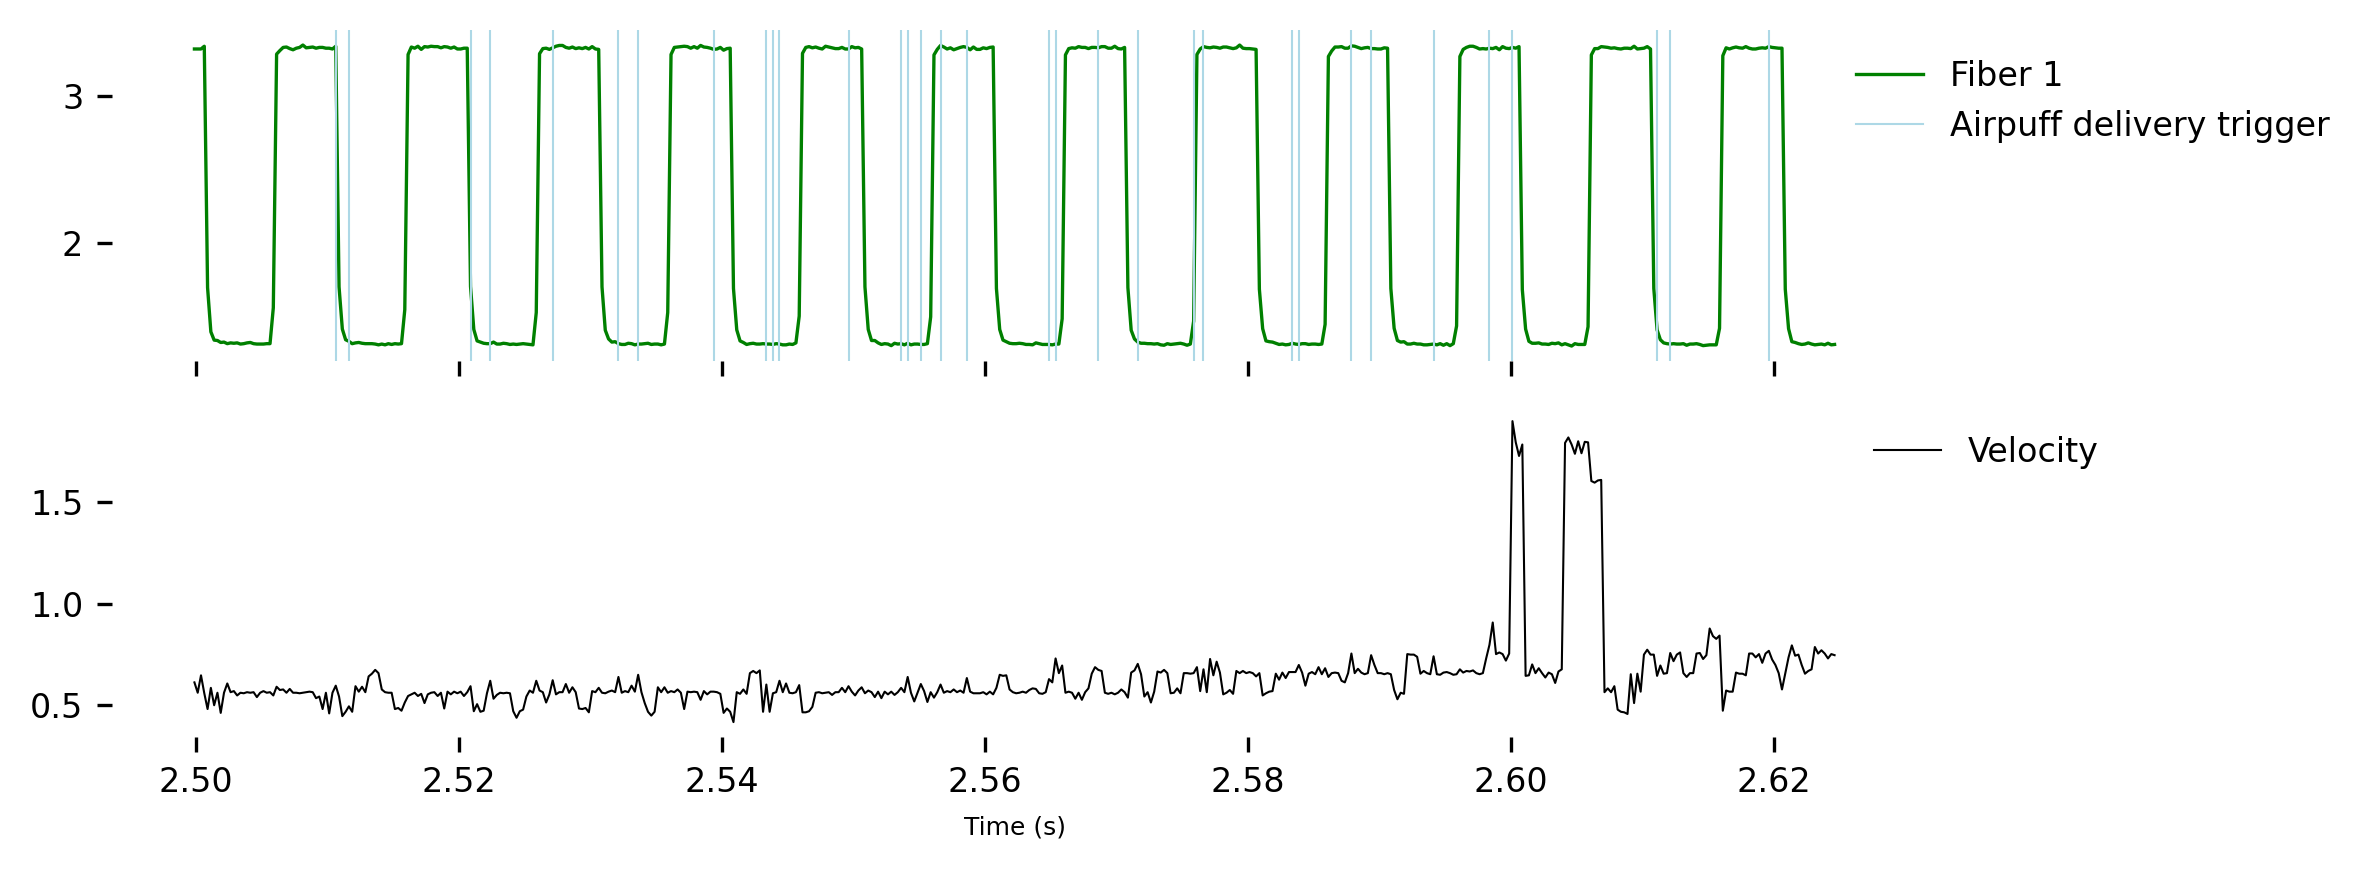

In [17]:
import pandas as pd
from matplotlib import pyplot as plt

# Prepare data for plotting
data = fluorescence_picoscope.data[10000:10500]
timestamps = fluorescence_picoscope.get_timestamps()[10000:10500]

velocity_data = velocity_picoscope.data[10000:10500]

# Add events during selected time
airpuff_events = events[events["event_type"] == 3]
event_times = airpuff_events[(airpuff_events["timestamp"] > 2.5 ) & (airpuff_events["timestamp"] <= 2.62)]["timestamp"]

fig, ax = plt.subplots(nrows=2, ncols=1,figsize=(8, 3), dpi=300, sharex=True)

ax[0].plot(timestamps, data, color="green", linewidth=0.8)
[ax[0].axvline(time, color='lightblue', linewidth=0.5) for time in event_times]

ax[1].plot(timestamps, velocity_data, color="black", linewidth=0.5)

ax[0].set_frame_on(False)
ax[1].set_frame_on(False)
ax[0].legend(["Fiber 1", "Airpuff delivery trigger"], frameon=False, bbox_to_anchor=(.95, 1), loc='upper left', prop={'size': 8})
ax[1].legend(["Velocity"], frameon=False, bbox_to_anchor=(.96, 1), loc='upper left', prop={'size': 8})
ax[1].tick_params(axis='y', labelsize=8)
ax[0].tick_params(axis='y', labelsize=8)

plt.xlabel('Time (s)', fontsize=6)
plt.tick_params(axis='x', labelsize=8)


plt.tight_layout()
plt.show()

## Picoscope TTL signals

The 405 nm and 470 nm illumination onset times are stored in a `TtlsTable` object using [`ndx-events`](https://github.com/rly/ndx-events) and can be accessed as `nwbfile.acquisition["TtlsTable"]`. The id of events and the description of the TTL event can be accessed as `nwbfile.acquisition["TtlTypesTable"]`.



In [12]:
import pandas as pd

ttl_times = pd.merge(
    left=nwbfile.acquisition["TtlsTable"][:],
    right=nwbfile.acquisition["TtlTypesTable"][:],
    left_on="ttl_type",
    right_on="id",
)
ttl_times.head()

,timestamp,ttl_type,event_name,event_type_description,pulse_value,duration
0,0.001000,1,Ch470,The times when the 470 nm LED was on.,1,0.005
1,0.006000,0,Ch405,The times when the 405 nm LED was on.,0,0.005
2,0.010999,1,Ch470,The times when the 470 nm LED was on.,1,0.005
3,0.015999,0,Ch405,The times when the 405 nm LED was on.,0,0.005
4,0.020999,1,Ch470,The times when the 470 nm LED was on.,1,0.005


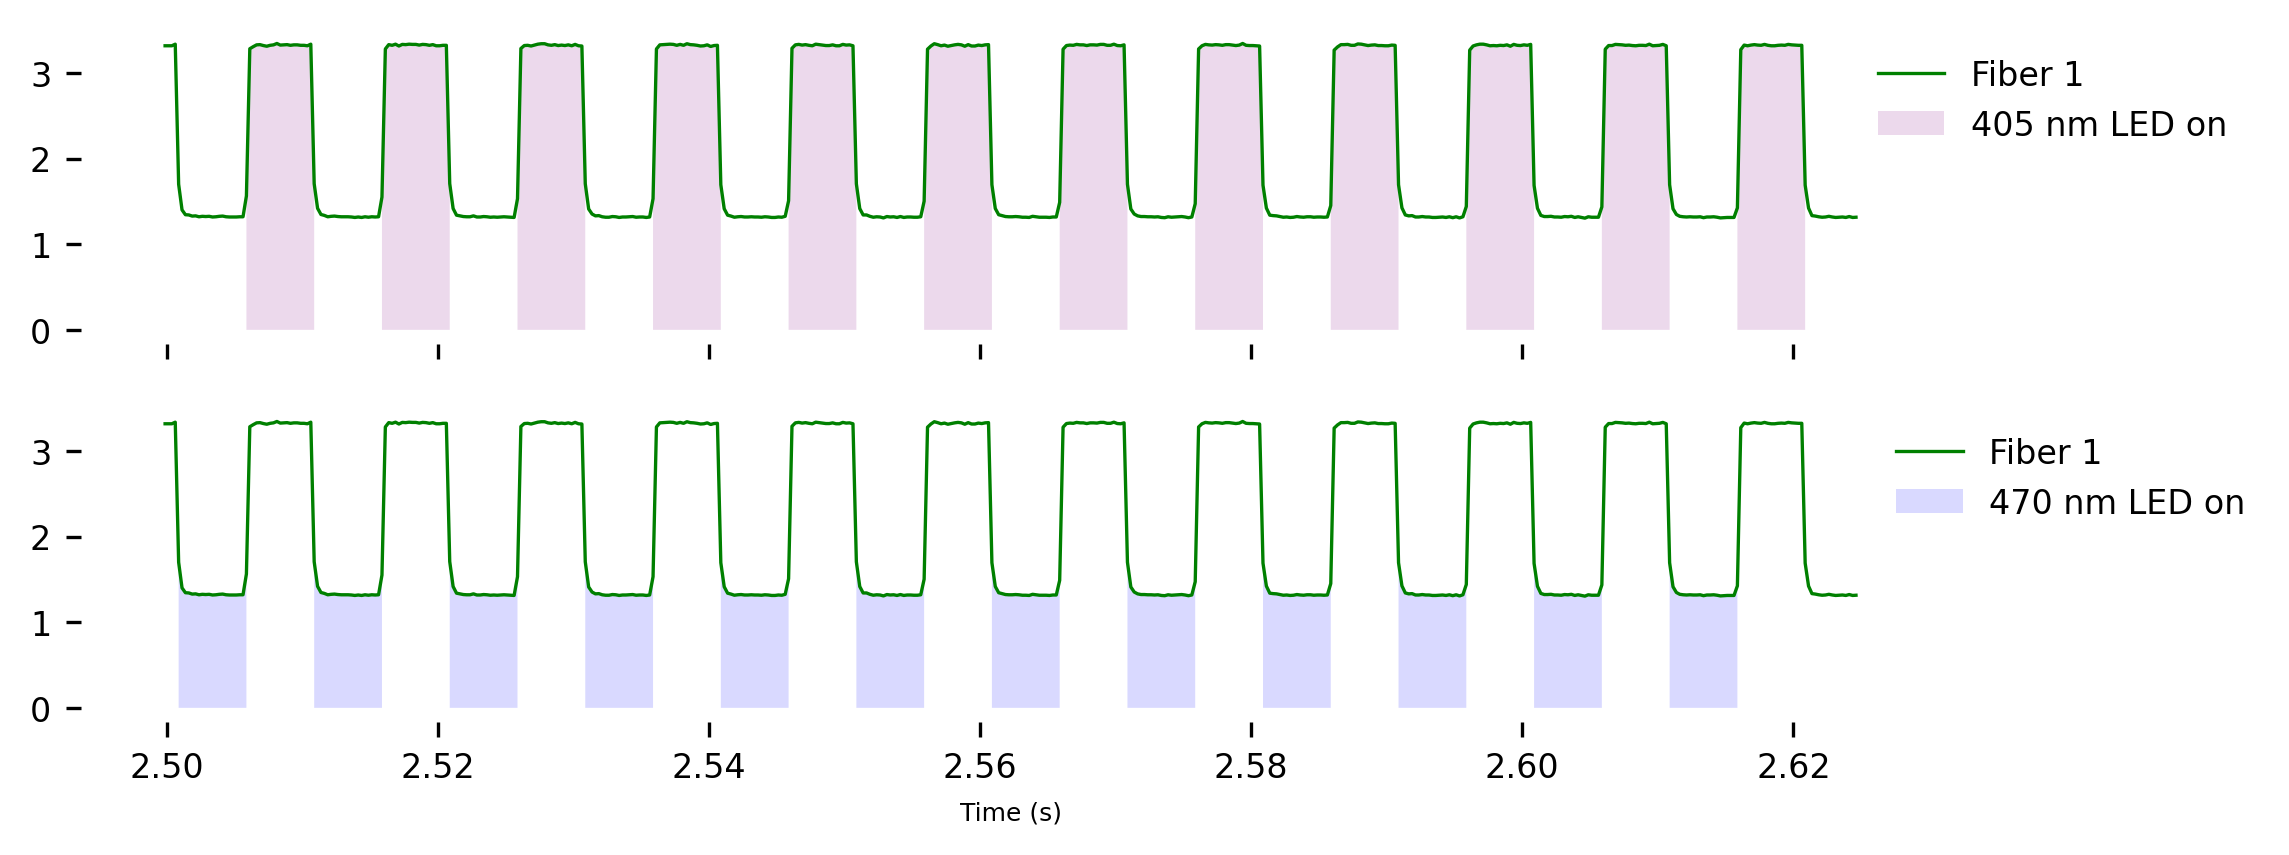

In [16]:
import pandas as pd
from matplotlib import pyplot as plt

# Prepare data for plotting
data = fluorescence_picoscope.data[10000:10500]
timestamps = fluorescence_picoscope.get_timestamps()[10000:10500]

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8, 3), dpi=300, sharex=True)
ax[0].plot(timestamps, data, color="green", linewidth=0.8)

ttl_0 = ttl_times[ttl_times["ttl_type"] == 0]
violet_illumination_times = ttl_0[(ttl_0["timestamp"] > 2.5 ) & (ttl_0["timestamp"] <= 2.62)]
for illumination_onset in violet_illumination_times["timestamp"]:
    fill_end = illumination_onset + 0.005
    ax[0].fill_between(timestamps, data, where=(timestamps >= illumination_onset) & (timestamps <= fill_end), color='purple', edgecolor='none', alpha=0.15)

ax[1].plot(timestamps, data, color="green", linewidth=0.8)

ttl_1 = ttl_times[ttl_times["ttl_type"] == 1]
blue_illumination_times = ttl_1[(ttl_1["timestamp"] > 2.5 ) & (ttl_1["timestamp"] <= 2.62)]
for illumination_onset in blue_illumination_times["timestamp"]:
    fill_end = illumination_onset + 0.005
    ax[1].fill_between(timestamps, data, where=(timestamps >= illumination_onset) & (timestamps <= fill_end), color='blue', edgecolor='none', alpha=0.15)

ax[0].set_frame_on(False)
ax[1].set_frame_on(False)
ax[0].legend(["Fiber 1", "405 nm LED on"], frameon=False, bbox_to_anchor=(.95, 1), loc='upper left', prop={'size': 8})
ax[1].legend(["Fiber 1", "470 nm LED on"], frameon=False, bbox_to_anchor=(.96, 1), loc='upper left', prop={'size': 8})
ax[1].tick_params(axis='y', labelsize=8)
ax[0].tick_params(axis='y', labelsize=8)

plt.xlabel('Time (s)', fontsize=6)
plt.tick_params(axis='x', labelsize=8)
plt.show()

## Fiber photometry traces

The fluorescence signals from the Picoscope were separated due to 405 vs 470 nm illumination (405 nm is GCaMP's isosbestic point and thus serves as a movement control) and were re-binned from 4000 Hz to 100 Hz.

The fluorescence traces are added to `nwbfile.acquisition` and are stored in a `FiberPhotometryResponseSeries` object using [`ndx-fiber-photometry`](https://github.com/catalystneuro/ndx-fiber-photometry). 
The fluorescence data during 470 nm excitation collected from Fiber 1 can be accessed as `nwbfile.acquisition["FiberPhotometryResponseSeriesGreenFiber1"]`. 

In [19]:
fiber_photometry_response_series = nwbfile.acquisition["FiberPhotometryResponseSeriesGreenFiber1"]
fiber_photometry_response_series

,location,indicator,optical_fiber,excitation_source,photodetector,dichroic_mirror,fiber_depth_in_mm,baseline_fluorescence,normalized_fluorescence,recording_target_type,signal_to_noise_ratio,cross_correlation_with_acceleration,coordinates,emission_filter,excitation_filter
id,,,,,,,,,,,,,,,
0,SNc,GCaMP6f abc.Indicator at 0x4975005584\nFields:\n injection_coordinates_in_mm: [-3.25 1.55 -3.8 ]\n injection_location: SNc\n label: AAV-GCaMP6f\n,Fiber1 abc.OpticalFiber at 0x5095934032\nFields:\n core_diameter_in_um: 200.0\n description: The optical fiber used to record the GCaMP fluorescence from the SNc brain region.\n manufacturer: Doric\n model: MFP_200/230/900-0.57_1.5m_FC-FLT_LAF\n numerical_aperture: 0.57\n,"ExcitationSource470 abc.ExcitationSource at 0x5096443728\nFields:\n description: Blue excitation light (470 nm LED, Thorlabs, M70F3) and violet excitation light (for the isosbestic control)\nwere coupled into the optic fiber such that a power of 0.75 mW was delivered to the fiber tip.\nThen, 470 nm and 405 nm excitation were alternated at 100 Hz using a waveform generator,\neach filtered with a corresponding filter.\n\n excitation_wavelength_in_nm: 470.0\n illumination_type: LED\n manufacturer: Thorlabs\n model: M70F3\n",PhotodetectorPMT abc.Photodetector at 0x4975814736\nFields:\n description: Hamamatsu GaAsP photomultiplier tube (signal amplified using Stanford Research Systems SR570 preamplifier).\n detected_wavelength_in_nm: 520.0\n detector_type: PMT\n manufacturer: Hamamatsu Photonics\n model: H10770PA-40\n,DichroicMirrorGreen abc.DichroicMirror at 0x4975609104\nFields:\n cut_on_wavelength_in_nm: 505.0\n description: The dichroic mirror used to separate green fluorescence from the excitation light.\n manufacturer: Chroma Tech Corp\n model: T505lpxr\n transmission_band_in_nm: [505. 750.]\n,3.6,1.041767,0.686421,cell bodies in SNc,18.898114,0.067393,"[nan, nan, nan]",EmissionFilterGreen abc.BandOpticalFilter at 0x4975620496\nFields:\n bandwidth_in_nm: 50.0\n center_wavelength_in_nm: 540.0\n description: The band-pass filter used to further filter the green fluorescence after it was separated from the excitation light by a dichroic mirror.\n filter_type: Bandpass\n manufacturer: Semrock\n model: FF01-540/50-25\n,OpticalFilter470 abc.BandOpticalFilter at 0x4975952720\nFields:\n bandwidth_in_nm: 30.0\n center_wavelength_in_nm: 472.0\n description: The band-pass filter used to isolate the 470 nm excitation light.\n filter_type: Bandpass\n manufacturer: Semrock\n model: FF02-472/30-25\n
1,SNc,GCaMP6f abc.Indicator at 0x4975005584\nFields:\n injection_coordinates_in_mm: [-3.25 1.55 -3.8 ]\n injection_location: SNc\n label: AAV-GCaMP6f\n,Fiber1 abc.OpticalFiber at 0x5095934032\nFields:\n core_diameter_in_um: 200.0\n description: The optical fiber used to record the GCaMP fluorescence from the SNc brain region.\n manufacturer: Doric\n model: MFP_200/230/900-0.57_1.5m_FC-FLT_LAF\n numerical_aperture: 0.57\n,"ExcitationSource405 abc.ExcitationSource at 0x4975008656\nFields:\n description: Violet LED (405 nm, Thorlabs, M405FP1) for the isosbestic control.\n excitation_wavelength_in_nm: 405.0\n illumination_type: LED\n manufacturer: Thorlabs\n model: M405FP1\n",PhotodetectorPMT abc.Photodetector at 0x4975814736\nFields:\n description: Hamamatsu GaAsP photomultiplier tube (signal amplified using Stanford Research Systems SR570 preamplifier).\n detected_wavelength_in_nm: 520.0\n detector_type: PMT\n manufacturer: Hamamatsu Photonics\n model: H10770PA-40\n,DichroicMirrorGreen abc.DichroicMirror at 0x4975609104\nFields:\n cut_on_wavelength_in_nm: 505.0\n description: The dichroic mirror used to separate green fluorescence from the excitation light.\n manufacturer: Chroma Tech Corp\n model: T505lpxr\n transmission_band_in_nm: [505. 750.]\n,3.6,1.041767,0.686421,cell bodies in SNc,18.898114,0.067393,"[nan, nan, nan]",EmissionFilterGreen abc.BandOpticalFilter at 0x4975620496\nFields:\n bandwidth_in_nm: 50.0\n center_wavelength_in_nm: 540.0

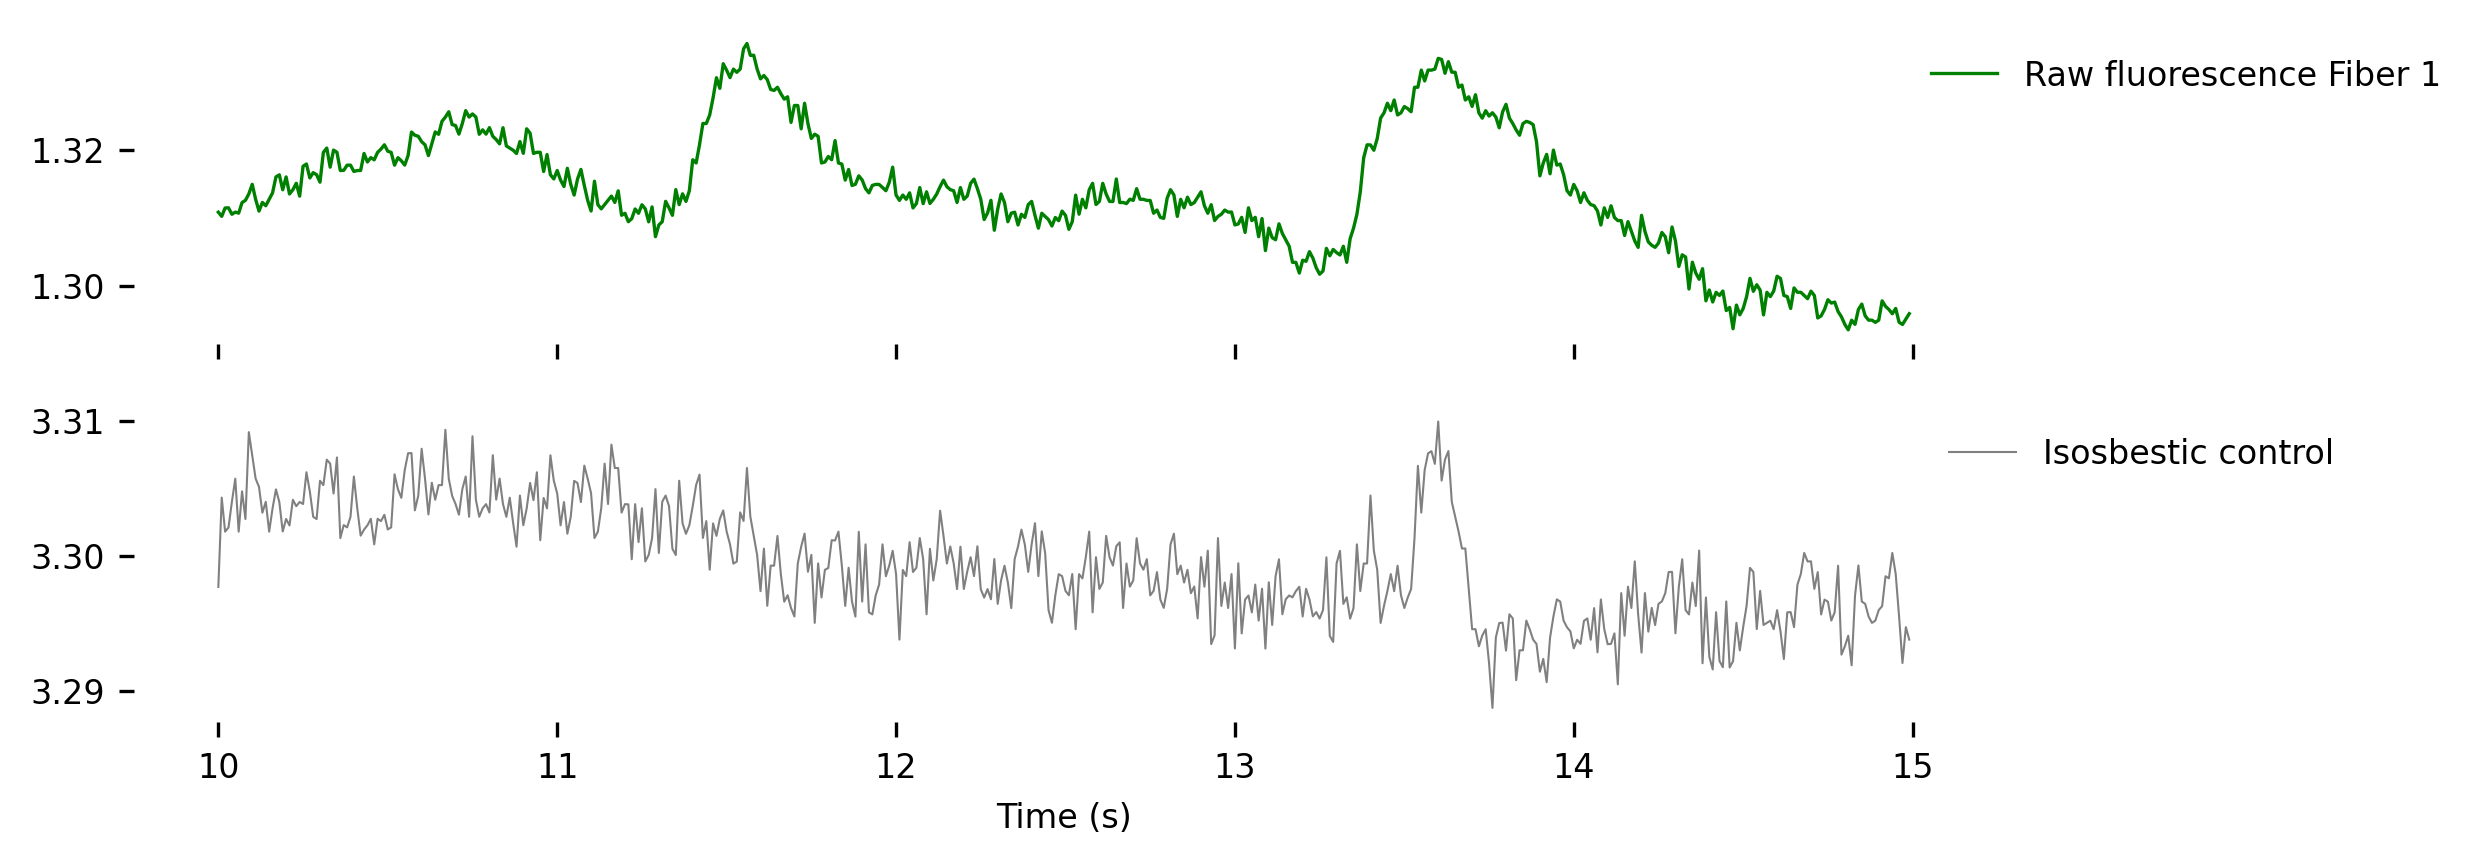

In [32]:
import pandas as pd
from matplotlib import pyplot as plt

# Prepare data for plotting
data = fiber_photometry_response_series.data[1000:1500]
timestamps = fiber_photometry_response_series.get_timestamps()[1000:1500]

control_signal = nwbfile.acquisition["FiberPhotometryResponseSeriesGreenIsosbesticFiber1"]
control_data = control_signal.data[1000:1500]

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8, 3), dpi=300, sharex=True)

# Plot data
ax[0].plot(timestamps, data, color="green", linewidth=0.8, label='Data')

# Plot control data with offset
ax[1].plot(timestamps, control_data, color="grey", linewidth=0.5, label='Control Data (shifted)')

ax[0].set_frame_on(False)
ax[1].set_frame_on(False)
ax[0].legend(["Raw fluorescence Fiber 1"], frameon=False, bbox_to_anchor=(.95, 1), loc='upper left', prop={'size': 8})
ax[1].legend(["Isosbestic control"], frameon=False, bbox_to_anchor=(.96, 1), loc='upper left', prop={'size': 8})
ax[1].tick_params(axis='y', labelsize=8)
ax[0].tick_params(axis='y', labelsize=8)


plt.xlabel('Time (s)', fontsize=8)
plt.tick_params(axis='x', labelsize=8)
plt.show()


## Fiber photometry metadata

The fiber photometry metadata includes the type of indicator(s), optical fiber(s), excitation source(s), photodector(s), dichroic mirror(s), and optical filter(s) that were used to construct a single fluorescence signal.

The metadata is stored in a `FiberPhotometryTable` object using [`ndx-fiber-photometry`](https://github.com/catalystneuro/ndx-fiber-photometry) and is added to `nwbfile.lab_meta_data`. It can be accessed as `nwbfile.lab_meta_data["FiberPhotometry"].fiber_photometry_table`.

In [25]:
nwbfile.lab_meta_data["FiberPhotometry"].fiber_photometry_table[:]

,location,indicator,optical_fiber,excitation_source,photodetector,dichroic_mirror,fiber_depth_in_mm,baseline_fluorescence,normalized_fluorescence,recording_target_type,signal_to_noise_ratio,cross_correlation_with_acceleration,coordinates,emission_filter,excitation_filter
id,,,,,,,,,,,,,,,
0,SNc,GCaMP6f abc.Indicator at 0x4975005584\nFields:...,Fiber1 abc.OpticalFiber at 0x5095934032\nField...,ExcitationSource470 abc.ExcitationSource at 0x...,PhotodetectorPMT abc.Photodetector at 0x497581...,DichroicMirrorGreen abc.DichroicMirror at 0x49...,3.6,1.041767,0.686421,cell bodies in SNc,18.898114,0.067393,"[nan, nan, nan]",EmissionFilterGreen abc.BandOpticalFilter at 0...,OpticalFilter470 abc.BandOpticalFilter at 0x49...
1,SNc,GCaMP6f abc.Indicator at 0x4975005584\nFields:...,Fiber1 abc.OpticalFiber at 0x5095934032\nField...,ExcitationSource405 abc.ExcitationSource at 0x...,PhotodetectorPMT abc.Photodetector at 0x497581...,DichroicMirrorGreen abc.DichroicMirror at 0x49...,3.6,1.041767,0.686421,cell bodies in SNc,18.898114,0.067393,"[nan, nan, nan]",EmissionFilterGreen abc.BandOpticalFilter at 0...,OpticalFilter405 abc.BandOpticalFilter at 0x49...
2,TS,GCaMP6f abc.Indicator at 0x4975005584\nFields:...,Fiber2 abc.OpticalFiber at 0x5096447504\nField...,ExcitationSource470 abc.ExcitationSource at 0x...,PhotodetectorPMT abc.Photodetector at 0x497581...,DichroicMirrorGreen abc.DichroicMirror at 0x49...,1.0,1.050157,0.053596,axons in striatum,0.000000,0.014802,"[3.0748749730962577, -0.58, 2.1599445426572172]",EmissionFilterGreen abc.BandOpticalFilter at 0...,OpticalFilter470 abc.BandOpticalFilter at 0x49...
3,TS,GCaMP6f abc.Indicator at 0x4975005584\nFields:...,Fiber2 abc.OpticalFiber at 0x5096447504\nField...,ExcitationSource405 abc.ExcitationSource at 0x...,PhotodetectorPMT abc.Photodetector at 0x497581...,DichroicMirrorGreen abc.DichroicMirror at 0x49...,1.0,1.050157,0.053596,axons in striatum,0.000000,0.014802,"[3.0748749730962577, -0.58, 2.1599445426572172]",EmissionFilterGreen abc.BandOpticalFilter at 0...,OpticalFilter405 abc.BandOpticalFilter at 0x49...


The `fiber_photometry_table_region` attribute in the `FiberPhotometryResponseSeries` object references row(s) of this table:

In [26]:
fiber_photometry_table_region = nwbfile.acquisition["FiberPhotometryResponseSeriesGreenFiber1"].fiber_photometry_table_region[:]
fiber_photometry_table_region

,location,indicator,optical_fiber,excitation_source,photodetector,dichroic_mirror,fiber_depth_in_mm,baseline_fluorescence,normalized_fluorescence,recording_target_type,signal_to_noise_ratio,cross_correlation_with_acceleration,coordinates,emission_filter,excitation_filter
id,,,,,,,,,,,,,,,
0,SNc,GCaMP6f abc.Indicator at 0x4975005584\nFields:...,Fiber1 abc.OpticalFiber at 0x5095934032\nField...,ExcitationSource470 abc.ExcitationSource at 0x...,PhotodetectorPMT abc.Photodetector at 0x497581...,DichroicMirrorGreen abc.DichroicMirror at 0x49...,3.6,1.041767,0.686421,cell bodies in SNc,18.898114,0.067393,"[nan, nan, nan]",EmissionFilterGreen abc.BandOpticalFilter at 0...,OpticalFilter470 abc.BandOpticalFilter at 0x49...


The metadata on the optical fiber used to record the GCaMP fluorescence is added to `nwbfile.devices` and can be acessed as `nwbfile.devices["Fiber1"]` or can be accessed from the referenced optical fiber in the `fiber_photometry_table_region` of the `FiberPhotometryResponseSeries`.

In [27]:
fiber_photometry_table_region["optical_fiber"][0]

Fiber1 abc.OpticalFiber at 0x5095934032
Fields:
  core_diameter_in_um: 200.0
  description: The optical fiber used to record the GCaMP fluorescence from the SNc brain region.
  manufacturer: Doric
  model: MFP_200/230/900-0.57_1.5m_FC-FLT_LAF
  numerical_aperture: 0.57

In [ ]:
fiber_photometry_table_region["indicator"][0]

In [ ]:
fiber_photometry_table_region["excitation_source"][0]

In [ ]:
fiber_photometry_table_region["photodetector"][0]

In [ ]:
fiber_photometry_table_region["dichroic_mirror"][0]

In [ ]:
fiber_photometry_table_region["emission_filter"][0]

In [ ]:
fiber_photometry_table_region["excitation_filter"][0]

# Access processed fiber photometry data <a name="access-processed-fiber-photometry"></a>

This section demonstrates how to access the processed fiber photometry data in the NWBfile.

The processed fiber photometry data is stored in "processing/ophys" which can be accessed as `nwbfile.processing["ophys"]`. Within this processing module we can access the ∆F/F traces from Fiber 1 as `nwbfile.processing["ophys"]["DfOverFFiberPhotometryResponseSeriesGreenFiber1"]`.

In [28]:
nwbfile.processing["ophys"]

,location,indicator,optical_fiber,excitation_source,photodetector,dichroic_mirror,fiber_depth_in_mm,baseline_fluorescence,normalized_fluorescence,recording_target_type,signal_to_noise_ratio,cross_correlation_with_acceleration,coordinates,emission_filter,excitation_filter
id,,,,,,,,,,,,,,,
0,SNc,GCaMP6f abc.Indicator at 0x4975005584\nFields:\n injection_coordinates_in_mm: [-3.25 1.55 -3.8 ]\n injection_location: SNc\n label: AAV-GCaMP6f\n,Fiber1 abc.OpticalFiber at 0x5095934032\nFields:\n core_diameter_in_um: 200.0\n description: The optical fiber used to record the GCaMP fluorescence from the SNc brain region.\n manufacturer: Doric\n model: MFP_200/230/900-0.57_1.5m_FC-FLT_LAF\n numerical_aperture: 0.57\n,"ExcitationSource470 abc.ExcitationSource at 0x5096443728\nFields:\n description: Blue excitation light (470 nm LED, Thorlabs, M70F3) and violet excitation light (for the isosbestic control)\nwere coupled into the optic fiber such that a power of 0.75 mW was delivered to the fiber tip.\nThen, 470 nm and 405 nm excitation were alternated at 100 Hz using a waveform generator,\neach filtered with a corresponding filter.\n\n excitation_wavelength_in_nm: 470.0\n illumination_type: LED\n manufacturer: Thorlabs\n model: M70F3\n",PhotodetectorPMT abc.Photodetector at 0x4975814736\nFields:\n description: Hamamatsu GaAsP photomultiplier tube (signal amplified using Stanford Research Systems SR570 preamplifier).\n detected_wavelength_in_nm: 520.0\n detector_type: PMT\n manufacturer: Hamamatsu Photonics\n model: H10770PA-40\n,DichroicMirrorGreen abc.DichroicMirror at 0x4975609104\nFields:\n cut_on_wavelength_in_nm: 505.0\n description: The dichroic mirror used to separate green fluorescence from the excitation light.\n manufacturer: Chroma Tech Corp\n model: T505lpxr\n transmission_band_in_nm: [505. 750.]\n,3.6,1.041767,0.686421,cell bodies in SNc,18.898114,0.067393,"[nan, nan, nan]",EmissionFilterGreen abc.BandOpticalFilter at 0x4975620496\nFields:\n bandwidth_in_nm: 50.0\n center_wavelength_in_nm: 540.0\n description: The band-pass filter used to further filter the green fluorescence after it was separated from the excitation light by a dichroic mirror.\n filter_type: Bandpass\n manufacturer: Semrock\n model: FF01-540/50-25\n,OpticalFilter470 abc.BandOpticalFilter at 0x4975952720\nFields:\n bandwidth_in_nm: 30.0\n center_wavelength_in_nm: 472.0\n description: The band-pass filter used to isolate the 470 nm excitation light.\n filter_type: Bandpass\n manufacturer: Semrock\n model: FF02-472/30-25\n
1,SNc,GCaMP6f abc.Indicator at 0x4975005584\nFields:\n injection_coordinates_in_mm: [-3.25 1.55 -3.8 ]\n injection_location: SNc\n label: AAV-GCaMP6f\n,Fiber1 abc.OpticalFiber at 0x5095934032\nFields:\n core_diameter_in_um: 200.0\n description: The optical fiber used to record the GCaMP fluorescence from the SNc brain region.\n manufacturer: Doric\n model: MFP_200/230/900-0.57_1.5m_FC-FLT_LAF\n numerical_aperture: 0.57\n,"ExcitationSource405 abc.ExcitationSource at 0x4975008656\nFields:\n description: Violet LED (405 nm, Thorlabs, M405FP1) for the isosbestic control.\n excitation_wavelength_in_nm: 405.0\n illumination_type: LED\n manufacturer: Thorlabs\n model: M405FP1\n",PhotodetectorPMT abc.Photodetector at 0x4975814736\nFields:\n description: Hamamatsu GaAsP photomultiplier tube (signal amplified using Stanford Research Systems SR570 preamplifier).\n detected_wavelength_in_nm: 520.0\n detector_type: PMT\n manufacturer: Hamamatsu Photonics\n model: H10770PA-40\n,DichroicMirrorGreen abc.DichroicMirror at 0x4975609104\nFields:\n cut_on_wavelength_in_nm: 505.0\n description: The dichroic mirror used to separate green fluorescence from the excitation light.\n manufacturer: Chroma Tech Corp\n model: T505lpxr\n transmission_band_in_nm: [505. 750.]\n,3.6,1.041767,0.686421,cell bodies in SNc,18.898114,0.067393,"[nan, nan, nan]",EmissionFilterGreen abc.BandOpticalFilter at 0x4975620496\nFields:\n bandwidth_in_nm: 50.0\n center_wavelength_in_nm: 540.0

In [29]:
df_over_f_traces = nwbfile.processing["ophys"]["DfOverFFiberPhotometryResponseSeriesGreenFiber1"]
df_over_f_traces

,location,indicator,optical_fiber,excitation_source,photodetector,dichroic_mirror,fiber_depth_in_mm,baseline_fluorescence,normalized_fluorescence,recording_target_type,signal_to_noise_ratio,cross_correlation_with_acceleration,coordinates,emission_filter,excitation_filter
id,,,,,,,,,,,,,,,
0,SNc,GCaMP6f abc.Indicator at 0x4975005584\nFields:\n injection_coordinates_in_mm: [-3.25 1.55 -3.8 ]\n injection_location: SNc\n label: AAV-GCaMP6f\n,Fiber1 abc.OpticalFiber at 0x5095934032\nFields:\n core_diameter_in_um: 200.0\n description: The optical fiber used to record the GCaMP fluorescence from the SNc brain region.\n manufacturer: Doric\n model: MFP_200/230/900-0.57_1.5m_FC-FLT_LAF\n numerical_aperture: 0.57\n,"ExcitationSource470 abc.ExcitationSource at 0x5096443728\nFields:\n description: Blue excitation light (470 nm LED, Thorlabs, M70F3) and violet excitation light (for the isosbestic control)\nwere coupled into the optic fiber such that a power of 0.75 mW was delivered to the fiber tip.\nThen, 470 nm and 405 nm excitation were alternated at 100 Hz using a waveform generator,\neach filtered with a corresponding filter.\n\n excitation_wavelength_in_nm: 470.0\n illumination_type: LED\n manufacturer: Thorlabs\n model: M70F3\n",PhotodetectorPMT abc.Photodetector at 0x4975814736\nFields:\n description: Hamamatsu GaAsP photomultiplier tube (signal amplified using Stanford Research Systems SR570 preamplifier).\n detected_wavelength_in_nm: 520.0\n detector_type: PMT\n manufacturer: Hamamatsu Photonics\n model: H10770PA-40\n,DichroicMirrorGreen abc.DichroicMirror at 0x4975609104\nFields:\n cut_on_wavelength_in_nm: 505.0\n description: The dichroic mirror used to separate green fluorescence from the excitation light.\n manufacturer: Chroma Tech Corp\n model: T505lpxr\n transmission_band_in_nm: [505. 750.]\n,3.6,1.041767,0.686421,cell bodies in SNc,18.898114,0.067393,"[nan, nan, nan]",EmissionFilterGreen abc.BandOpticalFilter at 0x4975620496\nFields:\n bandwidth_in_nm: 50.0\n center_wavelength_in_nm: 540.0\n description: The band-pass filter used to further filter the green fluorescence after it was separated from the excitation light by a dichroic mirror.\n filter_type: Bandpass\n manufacturer: Semrock\n model: FF01-540/50-25\n,OpticalFilter470 abc.BandOpticalFilter at 0x4975952720\nFields:\n bandwidth_in_nm: 30.0\n center_wavelength_in_nm: 472.0\n description: The band-pass filter used to isolate the 470 nm excitation light.\n filter_type: Bandpass\n manufacturer: Semrock\n model: FF02-472/30-25\n
1,SNc,GCaMP6f abc.Indicator at 0x4975005584\nFields:\n injection_coordinates_in_mm: [-3.25 1.55 -3.8 ]\n injection_location: SNc\n label: AAV-GCaMP6f\n,Fiber1 abc.OpticalFiber at 0x5095934032\nFields:\n core_diameter_in_um: 200.0\n description: The optical fiber used to record the GCaMP fluorescence from the SNc brain region.\n manufacturer: Doric\n model: MFP_200/230/900-0.57_1.5m_FC-FLT_LAF\n numerical_aperture: 0.57\n,"ExcitationSource405 abc.ExcitationSource at 0x4975008656\nFields:\n description: Violet LED (405 nm, Thorlabs, M405FP1) for the isosbestic control.\n excitation_wavelength_in_nm: 405.0\n illumination_type: LED\n manufacturer: Thorlabs\n model: M405FP1\n",PhotodetectorPMT abc.Photodetector at 0x4975814736\nFields:\n description: Hamamatsu GaAsP photomultiplier tube (signal amplified using Stanford Research Systems SR570 preamplifier).\n detected_wavelength_in_nm: 520.0\n detector_type: PMT\n manufacturer: Hamamatsu Photonics\n model: H10770PA-40\n,DichroicMirrorGreen abc.DichroicMirror at 0x4975609104\nFields:\n cut_on_wavelength_in_nm: 505.0\n description: The dichroic mirror used to separate green fluorescence from the excitation light.\n manufacturer: Chroma Tech Corp\n model: T505lpxr\n transmission_band_in_nm: [505. 750.]\n,3.6,1.041767,0.686421,cell bodies in SNc,18.898114,0.067393,"[nan, nan, nan]",EmissionFilterGreen abc.BandOpticalFilter at 0x4975620496\nFields:\n bandwidth_in_nm: 50.0\n center_wavelength_in_nm: 540.0

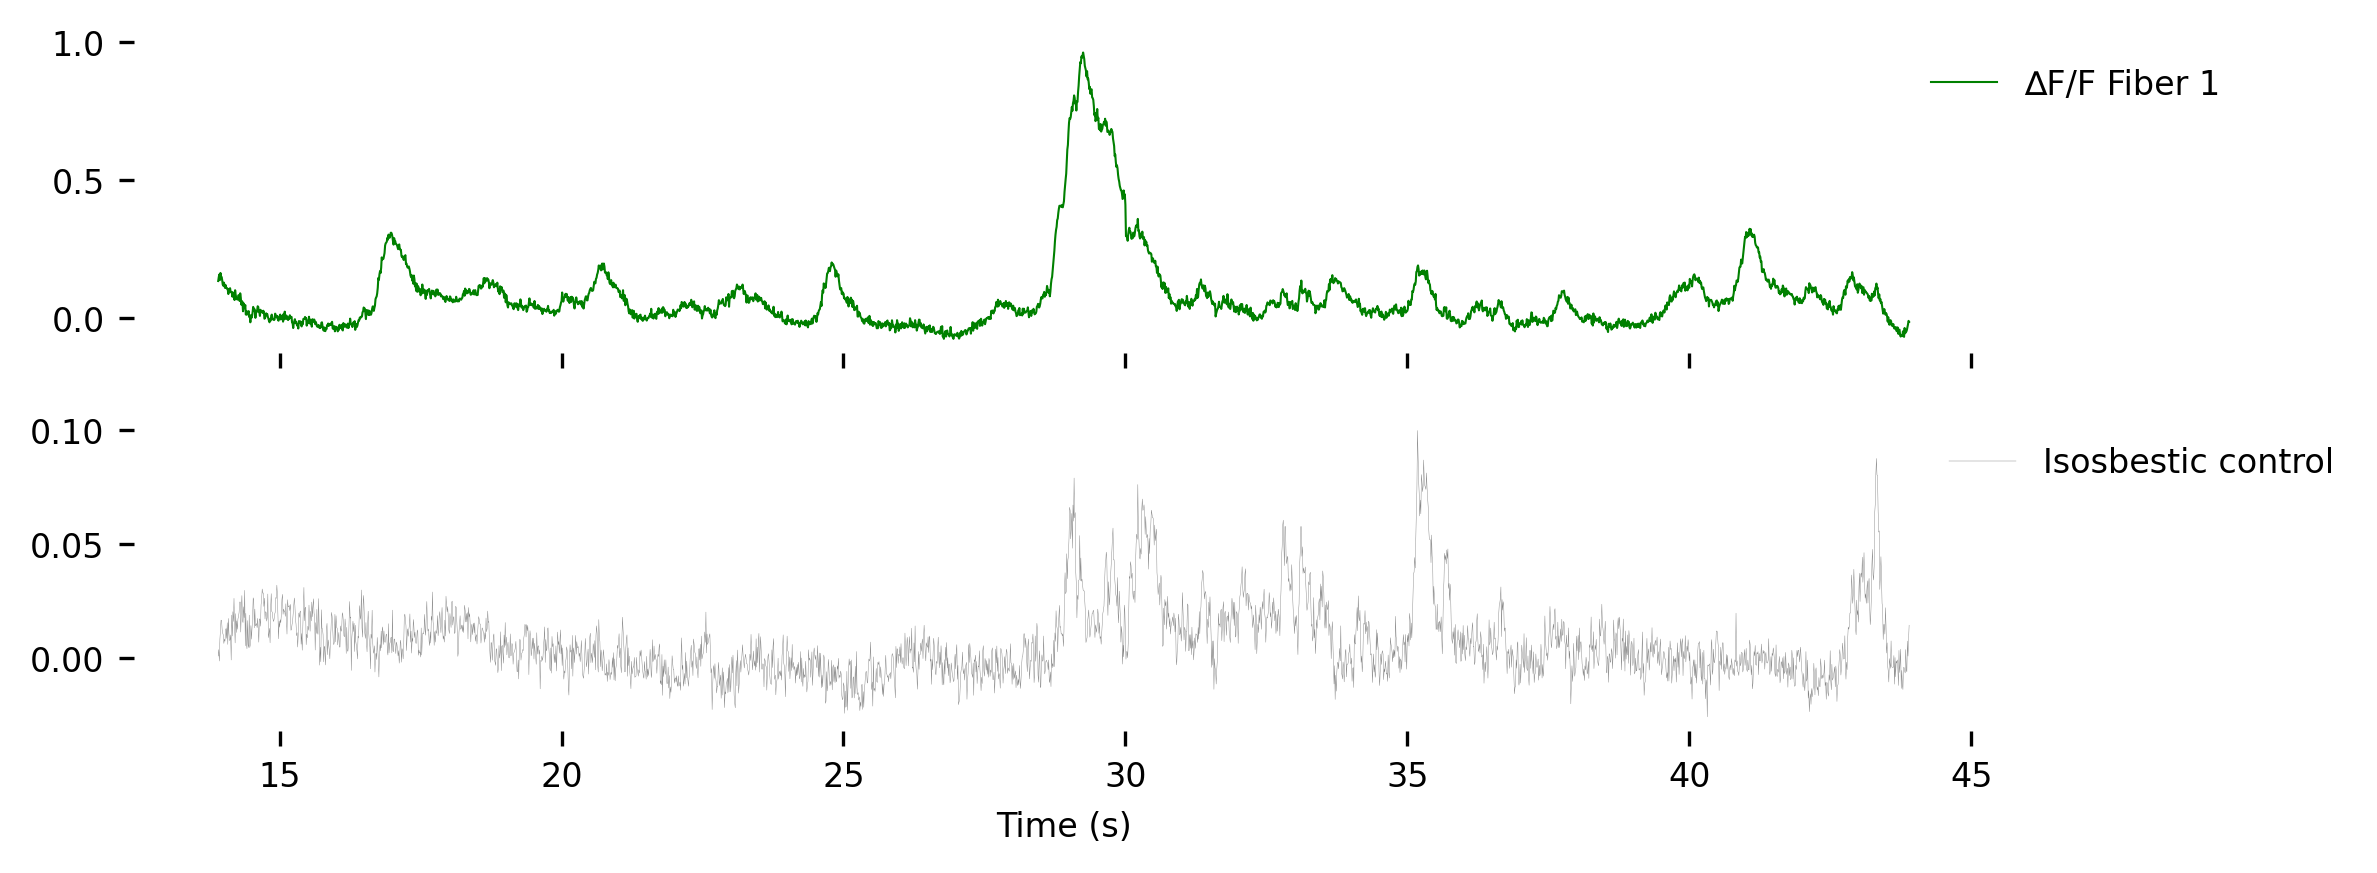

In [31]:
import pandas as pd
from matplotlib import pyplot as plt

# Prepare data for plotting
data = df_over_f_traces.data[0:3000]
timestamps = df_over_f_traces.get_timestamps()[0:3000]

control_signal = nwbfile.processing["ophys"]["DfOverFFiberPhotometryResponseSeriesGreenIsosbesticFiber1"]
control_data = control_signal.data[0:3000]

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8, 3), dpi=300, sharex=True)

# Plot data
ax[0].plot(timestamps, data, color="green", linewidth=0.5)

# Plot control data with offset
ax[1].plot(timestamps, control_data, color="grey", linewidth=0.1)

ax[0].set_frame_on(False)
ax[1].set_frame_on(False)
ax[0].legend(["∆F/F Fiber 1"], frameon=False, bbox_to_anchor=(.95, 1), loc='upper left', prop={'size': 8})
ax[1].legend(["Isosbestic control"], frameon=False, bbox_to_anchor=(.96, 1), loc='upper left', prop={'size': 8})
ax[1].tick_params(axis='y', labelsize=8)
ax[0].tick_params(axis='y', labelsize=8)


plt.xlabel('Time (s)', fontsize=8)
plt.tick_params(axis='x', labelsize=8)
plt.show()

# Access processed behavior <a name="access-behavior"></a>

This section demonstrates how to access the processed behavior data in the NWBfile.

The processed behavior data (veloctity, acceleration) is stored in "processing/behavior" which can be accessed as `nwbfile.processing["behavior"]`. Within this processing module we can access the velocity from the rotary encoder as `nwbfile.processing["behavior"]["Velocity"]`.

In [35]:
nwbfile.processing["behavior"]["Velocity"]

Velocity pynwb.base.TimeSeries at 0x4975817488
Fields:
  comments: no comments
  conversion: 1.0
  data: <HDF5 dataset "data": shape (167634,), type "<f8">
  description: The velocity from rotary encoder converted to m/s.
  offset: 0.0
  rate: 100.0
  resolution: -1.0
  starting_time: 13.91
  starting_time_unit: seconds
  unit: m/s

## Access derived events

### Wheel events

The derived events from the wheel (accelerations, decelerations) are also stored in an `EventsTable` object using [`ndx-events`](https://github.com/rly/ndx-events) and can be accessed as `nwbfile.processing["behavior"]["WheelEvents"]`. The id and the description of the events can be accessed as `nwbfile.processing["behavior"]["WheelEventTypes"]`.


In [126]:
import pandas as pd

wheel_events = pd.merge(
    left=nwbfile.processing["behavior"]["WheelEvents"][:],
    right=nwbfile.processing["behavior"]["WheelEventTypes"][:],
    left_on="event_type",
    right_on="id",
)
wheel_events.head()

,timestamp,event_type,event_name,event_type_description
0,13.95,0,Acceleration onset,The times of the Acceleration onset event.
1,16.93,0,Acceleration onset,The times of the Acceleration onset event.
2,21.87,0,Acceleration onset,The times of the Acceleration onset event.
3,27.46,1,Deceleration onset,The times of the Deceleration onset event.
4,27.83,0,Acceleration onset,The times of the Acceleration onset event.


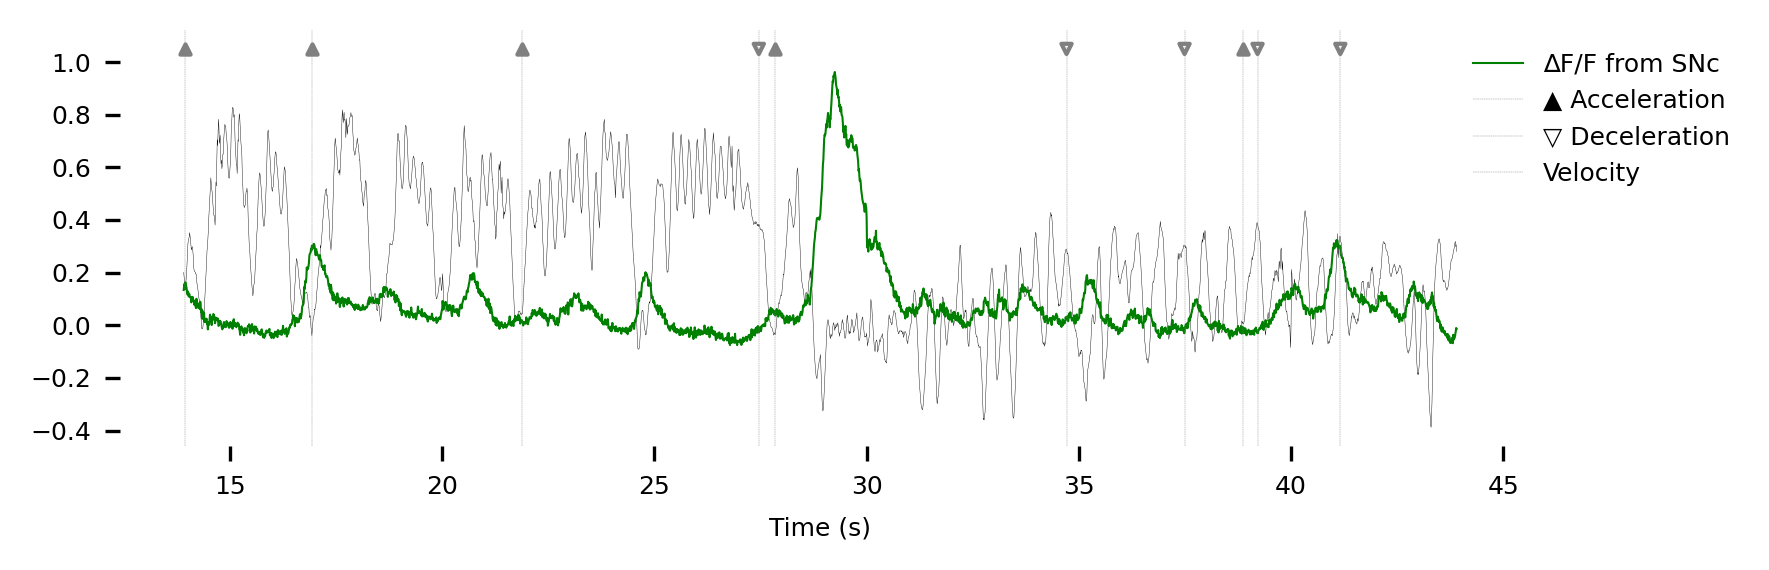

In [113]:
import pandas as pd
from matplotlib import pyplot as plt

# Prepare data for plotting
data = df_over_f_traces.data[:3000]
timestamps = df_over_f_traces.get_timestamps()[:3000]

velocity_data = nwbfile.processing["behavior"]["Velocity"].data[:3000]

# Add events during selected time
accelerations = wheel_events[wheel_events["event_type"] == 0]
accelerations = accelerations[accelerations["timestamp"] <= 45]["timestamp"]

decelerations = wheel_events[wheel_events["event_type"] == 1]
decelerations = decelerations[decelerations["timestamp"] <= 45]["timestamp"]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 2), dpi=300, sharex=True)

# Plot the main data
ax.plot(timestamps, data, color="green", linewidth=0.5)

# Add vertical lines
for time in accelerations:
    ax.axvline(time, color='grey', linewidth=0.1, linestyle="--")
for time in decelerations:
    ax.axvline(time, color='grey', linewidth=0.1, linestyle="--")

arrowhead_size = 6  # Adjust this value to change the size of the arrowheads
ax.scatter(accelerations, [1.05] * len(accelerations), color='grey', marker='^', s=arrowhead_size)
ax.scatter(decelerations, [1.05] * len(decelerations), marker='v', s=arrowhead_size, facecolor='none', edgecolor='grey')

# Plot the velocity data on the background
ax.plot(timestamps, velocity_data, color="black", linewidth=0.1, zorder=1)

# Remove frames
ax.set_frame_on(False)

# Add legends
ax.legend(["∆F/F from SNc", "▲ Acceleration", "▽ Deceleration", "Velocity"],frameon=False, bbox_to_anchor=(.95, 1), loc='upper left', prop={'size': 6})

# Adjust tick parameters
ax.tick_params(axis='y', labelsize=6)

plt.xlabel('Time (s)', fontsize=6)
plt.tick_params(axis='x', labelsize=6)
plt.tight_layout()
plt.show()


### Stimuli events

The times when the mouse was moving and the reward, air puff, light, and licking event times are added to `nwbfile.processing["behavior"]["Events"]`

In [233]:
events = nwbfile.processing["behavior"]["Events"][:]
events.head()

,start_time,stop_time,event_type,tags
id,,,,
0,13.91,201.82,MovOnOff,[]
1,28.59,28.67,Reward,[long]
2,28.85,32.24,Licking,[]
3,32.42,32.52,Licking,[]
4,32.55,32.66,Licking,[]


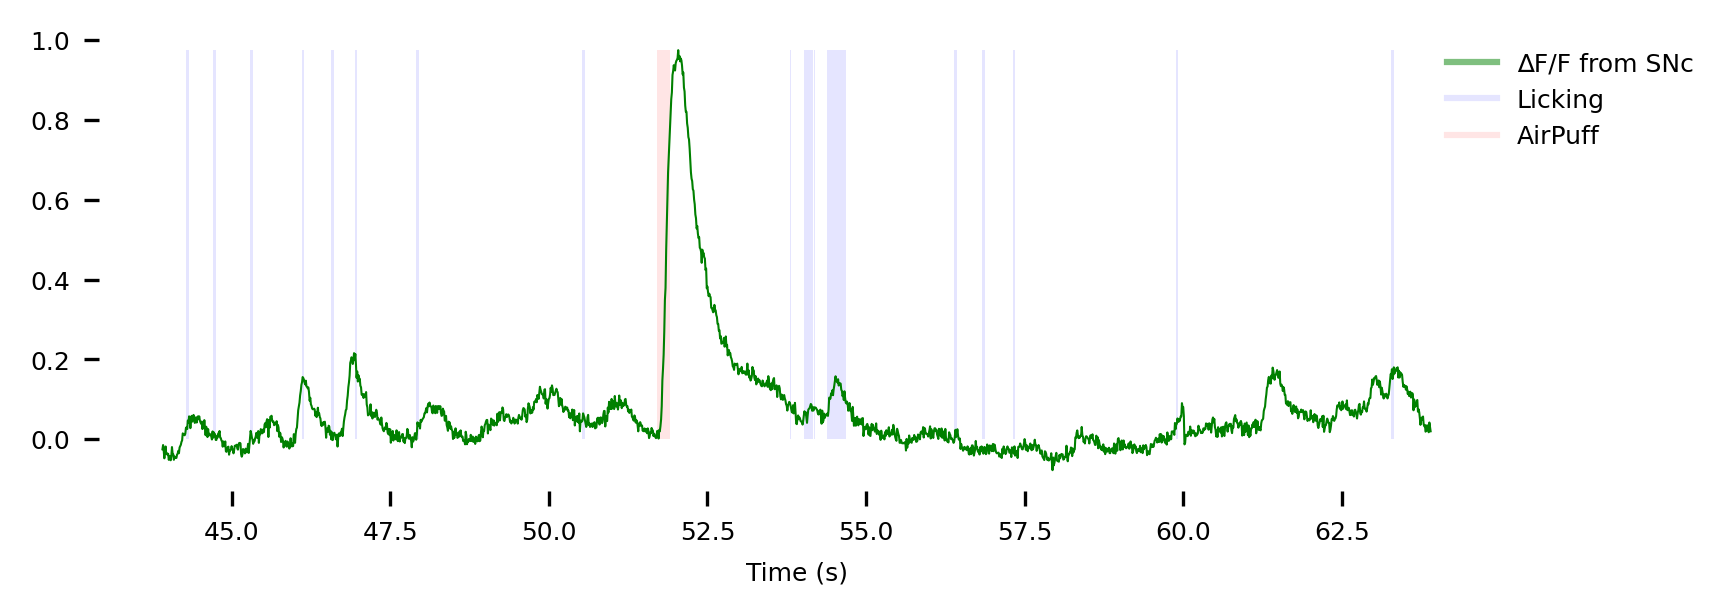

In [236]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.lines as mlines

# Prepare data for plotting
data = df_over_f_traces.data[3000:5000]
timestamps = df_over_f_traces.get_timestamps()[3000:5000]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 2), dpi=300, sharex=True)

# Plot the main data
ax.plot(timestamps, data, color="green", linewidth=0.5)

licking_events = events[events["event_type"] == "Licking"]
licking_events = licking_events[(licking_events["start_time"] >= timestamps[0]) & (licking_events["stop_time"] < timestamps[-1])]

airpuff_events = events[events["event_type"] == "AirPuff"]
airpuff_events = airpuff_events[(airpuff_events["start_time"] >= timestamps[0]) & (airpuff_events["stop_time"] < timestamps[-1])]

for ind, row in licking_events.iterrows():
    ax.fill_between(timestamps, max(data), where=(timestamps >= row["start_time"]) & (timestamps <= row["stop_time"]), color='blue', edgecolor='none', alpha=0.1)

for ind, row in airpuff_events.iterrows():
    ax.fill_between(timestamps, max(data), where=(timestamps >= row["start_time"]) & (timestamps <= row["stop_time"]), color='red', edgecolor='none', alpha=0.1)

ax.set_frame_on(False)

# Create proxy lines for legend entries with corresponding colors and transparency
green_line = mlines.Line2D([], [], color='green', label='∆F/F from SNc', alpha=0.5)
blue_line = mlines.Line2D([], [], color='blue', label='Licking', alpha=0.1)
red_line = mlines.Line2D([], [], color='red', label='AirPuff', alpha=0.1)

# Set legends with proxy lines
ax.legend(handles=[green_line, blue_line, red_line], frameon=False, bbox_to_anchor=(.95, 1), loc='upper left', prop={'size': 6})

ax.tick_params(axis='y', labelsize=6)

plt.xlabel('Time (s)', fontsize=6)
plt.tick_params(axis='x', labelsize=6)
plt.show()


### Fluorescence peaks

The onset times of large fluorescence peaks are also stored in an `EventsTable` object using [`ndx-events`](https://github.com/rly/ndx-events) and can be accessed as `nwbfile.analysis["PeakFluorescenceEvents"]`. The id and the description of the events can be accessed as `nwbfile.analysis["PeakFluorescenceEventTypes"]`.


In [235]:
import pandas as pd

peak_events = pd.merge(
    left=nwbfile.analysis["PeakFluorescenceEvents"][:],
    right=nwbfile.analysis["PeakFluorescenceEventTypes"][:],
    left_on="event_type",
    right_on="id",
)
peak_events.tail()

,timestamp,event_type,peak_fluorescence,event_name,event_type_description
1101,1683.64,0,0.099074,peaksG,Large transient peaks for Fiber 1 fluorescence
1102,1685.67,0,0.058068,peaksG,Large transient peaks for Fiber 1 fluorescence
1103,1685.67,1,0.058068,peaksGRun,Large transient peaks occurring during running...
1104,1689.86,0,0.113421,peaksG,Large transient peaks for Fiber 1 fluorescence
1105,1689.86,1,0.113421,peaksGRun,Large transient peaks occurring during running...


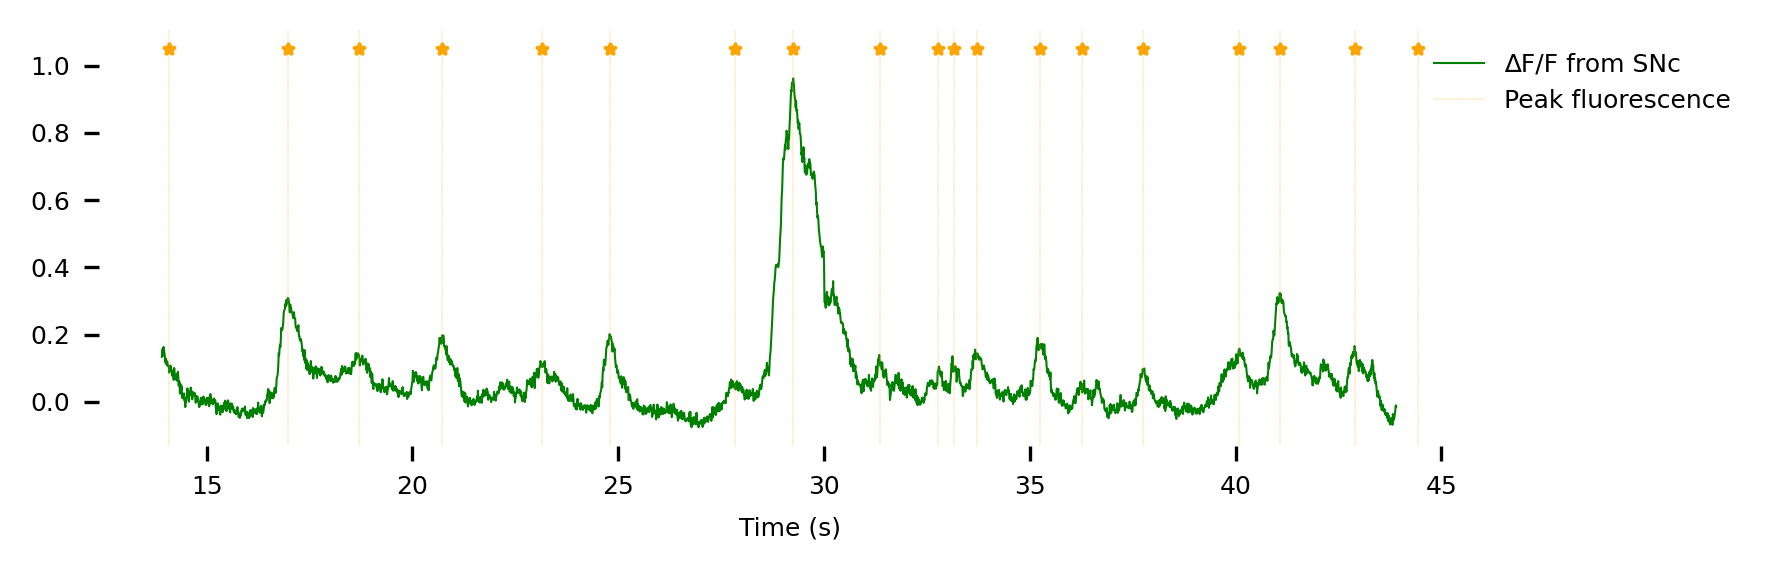

In [125]:
import pandas as pd
from matplotlib import pyplot as plt

# Prepare data for plotting
data = df_over_f_traces.data[:3000]
timestamps = df_over_f_traces.get_timestamps()[:3000]

# Add events during selected time
peak_event_times = peak_events[peak_events["event_type"] == 0]
peak_event_times = peak_event_times[peak_event_times["timestamp"] <= 45]["timestamp"]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 2), dpi=300, sharex=True)

# Plot the main data
ax.plot(timestamps, data, color="green", linewidth=0.5)

# Add vertical lines
for time in peak_event_times:
    ax.axvline(time, color='orange', linewidth=0.1, linestyle="--")
    
arrowhead_size = 6  # Adjust this value to change the size of the arrowheads
ax.scatter(peak_event_times, [1.05] * len(peak_event_times), color='orange', marker='*', s=arrowhead_size)

# Remove frames
ax.set_frame_on(False)

# Add legends
ax.legend(["∆F/F from SNc", "Peak fluorescence"],frameon=False, bbox_to_anchor=(.95, 1), loc='upper left', prop={'size': 6})

# Adjust tick parameters
ax.tick_params(axis='y', labelsize=6)

plt.xlabel('Time (s)', fontsize=6)
plt.tick_params(axis='x', labelsize=6)
plt.tight_layout()
plt.show()


# View NWB <a name="view-nwb"></a>

This section demonstrates how to use [Neurosift](https://github.com/flatironinstitute/neurosift) to interactively visualize the data in the NWBfile.


In [237]:
from IPython.display import IFrame

url = "https://neurosift.app/?p=/nwb&url=https://api.dandiarchive.org/api/assets/a07e739d-6246-4f76-8649-9a345cfbdda7/download/&dandisetId=001038&dandisetVersion=draft&tab=neurodata-items:neurodata-item:/processing/ophys/DfOverFFiberPhotometryResponseSeriesGreenFiber1|FiberPhotometryResponseSeries@neurodata-item:/processing/ophys/DfOverFFiberPhotometryResponseSeriesGreenIsosbesticFiber1|FiberPhotometryResponseSeries@neurodata-item:/processing/behavior/Velocity|TimeSeries"
IFrame(url, width=1200, height=1000)